In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [21]:
df_prim = pd.read_csv("breast-cancer-wisconsin.csv")
df_prim["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

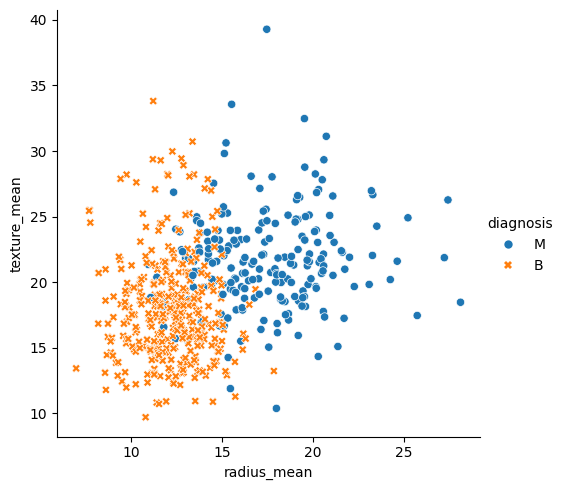

In [6]:
sns.relplot(data=df, 
            x='radius_mean',
            y='texture_mean',
            hue='diagnosis',
            style='diagnosis'
            )

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
df.iloc[:,2:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
clasificador =  RandomForestClassifier()
normalizador = MinMaxScaler(feature_range=(0,1))
normado =  normalizador.fit_transform(df_prim.iloc[:,2:])
df = pd.DataFrame(normado,columns=df_prim.columns.tolist()[2:] ) # Y

c:\Users\molten gama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\molten gama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
tokenizador = LabelEncoder()
tokenizados = tokenizador.fit_transform(df_prim["diagnosis"]) # X

In [27]:
x_entrena, x_prueba, y_entrena,y_prueba = train_test_split(df, tokenizados, train_size=0.7, random_state=42)

In [ ]:
clasificador.fit(x_entrena, y_entrena)


RandomForestClassifier()

In [29]:
clasificador.score(x_prueba, y_prueba)

0.9707602339181286

In [39]:
data_pruebas = {
    "radius_mean": [17.1, 11.8, 20.3, 13.4, 21.2, 14.2, 19.1, 12.6, 22.0, 13.8],
    "texture_mean": [20.2, 14.5, 22.7, 15.6, 24.1, 16.3, 21.5, 13.9, 25.3, 15.1],
    "perimeter_mean": [120.2, 80.9, 132.5, 87.2, 140.1, 89.8, 128.4, 84.1, 142.2, 90.3],
    "area_mean": [980.5, 450.3, 1320.1, 520.4, 1450.2, 560.3, 1240.6, 500.7, 1502.4, 570.8],
    "smoothness_mean": [0.104, 0.092, 0.118, 0.089, 0.120, 0.087, 0.110, 0.085, 0.122, 0.090],
    "compactness_mean": [0.153, 0.135, 0.165, 0.140, 0.168, 0.138, 0.160, 0.132, 0.170, 0.145],
    "concavity_mean": [0.200, 0.075, 0.210, 0.072, 0.225, 0.068, 0.190, 0.070, 0.230, 0.080],
    "concave points_mean": [0.099, 0.031, 0.110, 0.030, 0.115, 0.028, 0.095, 0.027, 0.120, 0.035],
    "symmetry_mean": [0.192, 0.180, 0.195, 0.175, 0.198, 0.172, 0.190, 0.170, 0.200, 0.185],
    "fractal_dimension_mean": [0.062, 0.058, 0.063, 0.057, 0.064, 0.056, 0.061, 0.055, 0.065, 0.059],
    "radius_se": [0.5, 0.3, 0.7, 0.4, 0.8, 0.5, 0.6, 0.3, 0.9, 0.4],
    "texture_se": [1.1, 0.6, 1.3, 0.7, 1.5, 0.8, 1.2, 0.6, 1.6, 0.7],
    "perimeter_se": [2.5, 1.2, 3.0, 1.5, 3.2, 1.6, 2.8, 1.3, 3.5, 1.7],
    "area_se": [50.2, 25.4, 60.3, 30.1, 65.4, 32.2, 55.3, 28.5, 70.1, 35.0],
    "smoothness_se": [0.007, 0.004, 0.009, 0.005, 0.010, 0.006, 0.008, 0.004, 0.011, 0.005],
    "compactness_se": [0.025, 0.015, 0.030, 0.018, 0.035, 0.020, 0.028, 0.016, 0.040, 0.021],
    "concavity_se": [0.040, 0.020, 0.050, 0.025, 0.055, 0.027, 0.045, 0.022, 0.060, 0.030],
    "concave points_se": [0.015, 0.005, 0.020, 0.007, 0.022, 0.008, 0.017, 0.006, 0.025, 0.010],
    "symmetry_se": [0.020, 0.013, 0.025, 0.015, 0.028, 0.016, 0.022, 0.014, 0.030, 0.018],
    "fractal_dimension_se": [0.005, 0.003, 0.006, 0.004, 0.007, 0.003, 0.005, 0.003, 0.008, 0.004],
    "radius_worst": [19.1, 12.8, 22.5, 14.4, 24.3, 15.2, 21.7, 13.6, 25.0, 14.8],
    "texture_worst": [25.3, 17.5, 28.4, 18.2, 30.2, 19.1, 26.8, 16.7, 31.5, 18.9],
    "perimeter_worst": [132.4, 90.3, 145.6, 95.7, 152.3, 98.1, 140.5, 88.4, 155.2, 96.3],
    "area_worst": [1350.4, 520.8, 1600.3, 580.2, 1700.5, 600.1, 1400.7, 540.2, 1750.8, 620.4],
    "smoothness_worst": [0.120, 0.100, 0.130, 0.102, 0.135, 0.101, 0.125, 0.098, 0.140, 0.103],
    "compactness_worst": [0.185, 0.150, 0.200, 0.155, 0.210, 0.160, 0.190, 0.145, 0.220, 0.165],
    "concavity_worst": [0.240, 0.085, 0.260, 0.090, 0.280, 0.095, 0.250, 0.082, 0.300, 0.100],
    "concave points_worst": [0.130, 0.035, 0.150, 0.037, 0.165, 0.040, 0.140, 0.032, 0.170, 0.042],
    "symmetry_worst": [0.220, 0.190, 0.230, 0.185, 0.240, 0.180, 0.225, 0.175, 0.250, 0.195],
    "fractal_dimension_worst": [0.072, 0.062, 0.075, 0.065, 0.078, 0.064, 0.073, 0.061, 0.080, 0.067],
    "Unnamed: 32": [0]*10
}
data_pruebas = pd.DataFrame(data_pruebas)
prediccion =clasificador.predict(data_pruebas)
print(prediccion)
probabilidades = clasificador.predict_proba(data_pruebas)
probabilidades




[1 0 1 1 1 0 1 1 1 1]


array([[0.32, 0.68],
       [0.5 , 0.5 ],
       [0.3 , 0.7 ],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.5 , 0.5 ],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.32, 0.68],
       [0.49, 0.51]])

10